## 1.0 Change working Directory to Root Directory

In [1]:
# Set the repository root as a working directory 
%cd ..

/mnt/c/Users/MR-BEST/course-ds-base-root/course-ds-base


/home/mr-best/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### 2.0 Init DVC repository
 2.1 Init DVC repository and setup DVC remote storage

dvc init

2.2 Add DVC repository under git control

git add .
git commit -m "Init DVC repo"

# 2.3 View config

In [2]:
# Look on stages config 
!cat params.yaml

#### Initial state before the update

# base:
#   random_state: 42
#   log_level: INFO

# data:
  # dataset_csv: 'data/raw/iris.csv'
#   features_path: 'data/processed/featured_iris.csv'
#   test_size: 0.2
#   trainset_path: 'data/processed/train_iris.csv'
#   testset_path: 'data/processed/test_iris.csv'


# train:
#   clf_params:
#     'C': 0.001
#     'solver': 'lbfgs'
#     'multi_class': 'multinomial'
#     'max_iter': 100
#   model_path: 'models/model.joblib'

# reports:
#   metrics_file: 'reports/metrics.json'
#   confusion_matrix_image: 'reports/confusion_matrix.png'

  #### Newer Versions of Metrics

  
base:
  random_state: 42
  log_level: INFO


data_load:
  dataset_csv: 'data/raw/iris.csv'


featurize:
  features_path: 'data/processed/featured_iris.csv'
  target_column: target


data_split:
  test_size: 0.2
  trainset_path: 'data/processed/train_iris.csv'
  testset_path: 'data/processed/test_iris.csv'


train:

  cv: 3
  estimator_name: logreg
  estimators:
    logreg: # skl

### 3.0 Create and run stages for a DVC pipeline

## 3.1 First Stage of ML Pipeline : Extract and Raw Load Data

In [ ]:
dvc stage add -n data_load \
    -d src/stages/data_load.py \
    -o data/raw/iris.csv \
    -p base,data_load \
    python src/stages/data_load.py --config=params.yaml

# Config

In [4]:
# Load the function to load raw data

from src.stages.data_load import data_load

# Call function
data_load(config_file = 'params.yaml')

data load completed successfully


In [5]:
# Shell prompt for running "load_data" function

!python3 src/stages/data_load.py --config=params.yaml

data load completed successfully


In [6]:
%%bash 

# View the Raw Iris dataset saved 

ls data/raw

iris.csv


## Extract feautures using python module at src/stages/featurize.py

In [7]:
# Load,curate and save features (x1,...xn) the function to load raw data

from src.stages.featurize import featurize

# Call function
featurize(config_path = 'params.yaml')

2024-01-15 09:30:00,157 — FEATURIZE — INFO — Load the raw data
2024-01-15 09:30:00,166 — FEATURIZE — INFO — Curate by extraction of features from the dataset
2024-01-15 09:30:00,169 — FEATURIZE — INFO — Save features


In [8]:
# Shell prompt for running "load_data" function. Load,curate and save features (x1,...xn)

!python src/stages/featurize.py --config=params.yaml

2024-01-15 09:30:21,699 — FEATURIZE — INFO — Load the raw data
2024-01-15 09:30:21,706 — FEATURIZE — INFO — Curate by extraction of features from the dataset
2024-01-15 09:30:21,708 — FEATURIZE — INFO — Save features


# Split dataset

In [9]:
# Call the Split module by loading saved features from local memory, splitting into train and test sets; and saving completion

from src.stages.data_split import data_split

# Call function
data_split(config_path = 'params.yaml')

2024-01-15 09:31:43,126 — DATA_SPLIT — INFO — Load features
2024-01-15 09:31:43,137 — DATA_SPLIT — INFO — Split features into train and test sets
2024-01-15 09:31:43,140 — DATA_SPLIT — INFO — Save features for training and testing models


In [10]:
# Shell prompt for running "data split" function

!python3 src/stages/data_split.py --config=params.yaml

2024-01-15 09:31:51,795 — DATA_SPLIT — INFO — Load features
2024-01-15 09:31:51,804 — DATA_SPLIT — INFO — Split features into train and test sets
2024-01-15 09:31:51,805 — DATA_SPLIT — INFO — Save features for training and testing models


# Train

In [22]:
# Name model,Load, train and save model/estimator

from src.stages.train import train_model

# Call function
train_model(config_path = 'params.yaml')

2024-01-15 10:22:31,528 — TRAIN — INFO — Get model/estimator name
2024-01-15 10:22:31,529 — TRAIN — INFO — The name of Model/Estimator: logreg
2024-01-15 10:22:31,530 — TRAIN — INFO — Load train dataset
2024-01-15 10:22:31,544 — TRAIN — INFO — Train model/estimator
Fitting 3 folds for each of 1 candidates, totalling 3 fits
2024-01-15 10:22:31,577 — TRAIN — INFO — Best score: 0.857564307288572
2024-01-15 10:22:31,578 — TRAIN — INFO — Trained Model Saved


In [21]:
# Shell prompt for running "train model" function

!python3 src/stages/train.py --config=params.yaml

2024-01-15 10:22:21,429 — TRAIN — INFO — Get model/estimator name
2024-01-15 10:22:21,429 — TRAIN — INFO — The name of Model/Estimator: logreg
2024-01-15 10:22:21,429 — TRAIN — INFO — Load train dataset
2024-01-15 10:22:21,440 — TRAIN — INFO — Train model/estimator
Fitting 3 folds for each of 1 candidates, totalling 3 fits
2024-01-15 10:22:21,463 — TRAIN — INFO — Best score: 0.857564307288572
2024-01-15 10:22:21,463 — TRAIN — INFO — Trained Model Saved


#### 4.  EVALUATE MODEL : load dataset,test, Evaluate with F1 and CM and save model/estimator

2024-01-15 10:51:16,267 — EVALUATE — INFO — Load model
2024-01-15 10:51:16,276 — EVALUATE — INFO — Load test dataset
2024-01-15 10:51:16,288 — EVALUATE — INFO — Evaluate (build report)
2024-01-15 10:51:16,295 — EVALUATE — INFO — Save metrics
2024-01-15 10:51:16,302 — EVALUATE — INFO — F1 metrics file saved to : reports/metrics.json
2024-01-15 10:51:16,303 — EVALUATE — INFO — Save confusion matrix
2024-01-15 10:51:16,474 — EVALUATE — INFO — Confusion matrix saved to : reports/confusion_matrix.png


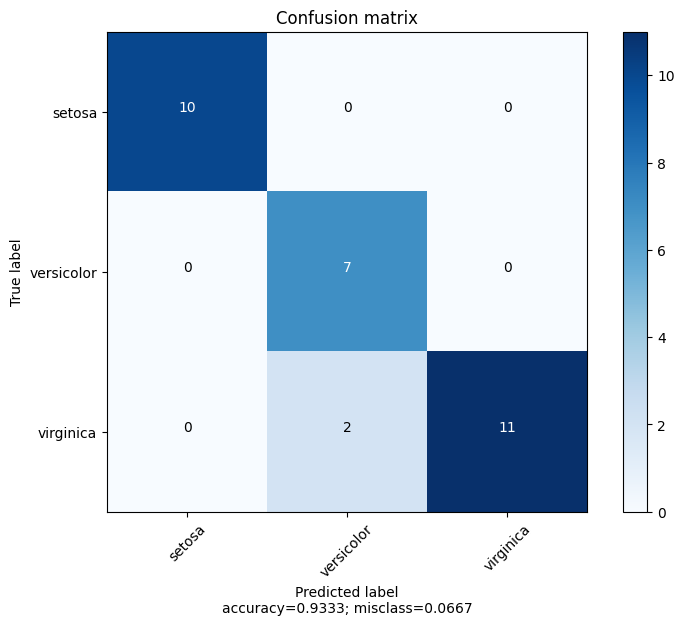

In [28]:

#  Load dataset,test, Evaluate with F1 and CM and save model/estimator

from src.stages.evaluate import evaluate_model


# Call function
evaluate_model(config_path = 'params.yaml')

In [29]:
# Shell prompt for running "EVALUATE MODEL" function. oad dataset,test, Evaluate with F1 and CM and save model/estimator

!python3 src/stages/evaluate.py --config=params.yaml

2024-01-15 10:51:24,829 — EVALUATE — INFO — Load model
2024-01-15 10:51:24,866 — EVALUATE — INFO — Load test dataset
2024-01-15 10:51:24,877 — EVALUATE — INFO — Evaluate (build report)
2024-01-15 10:51:24,880 — EVALUATE — INFO — Save metrics
2024-01-15 10:51:24,884 — EVALUATE — INFO — F1 metrics file saved to : reports/metrics.json
2024-01-15 10:51:24,884 — EVALUATE — INFO — Save confusion matrix
2024-01-15 10:51:25,005 — EVALUATE — INFO — Confusion matrix saved to : reports/confusion_matrix.png
